In [1]:
#Brief: Weight is costs of transportation, with USA being end export goal
import pandas as pd #Used to Shape Data and make it easier to work with
import networkx as nx #Used to create some undirected graphs
import numpy as np #Some computing functions
import matplotlib.pyplot as plt #Used for visualizations
import pylab #To have in case

df = pd.read_csv('Edges.csv') #Read data into Pandas dataframe
print(df)

            Source          Target        Type  Weight
0          Tumaco*             USA   Directed    17.08
1    Barranquilla*             USA   Directed    15.63
2   Buenaventura**             USA   Directed     8.97
3       Guayaquil*             USA   Directed    17.66
4    Esmeraldas***             USA   Directed     3.19
5     La Libertad*             USA   Directed    19.36
6           Paita*             USA   Directed    13.32
7        Talara***             USA   Directed     3.93
8          Callao*             USA   Directed    13.65
9     Oil Source 1         Tumaco*   Directed     2.00
10    Oil Source 1   Barranquilla*   Directed     1.00
11    Oil Source 1  Buenaventura**   Directed     6.00
12    Oil Source 2      Guayaquil*   Directed     4.00
13    Oil Source 2   Esmeraldas***   Directed     3.00
14    Oil Source 2    La Libertad*   Directed     7.00
15    Oil Source 3          Paita*   Directed     9.00
16    Oil Source 3       Talara***   Directed     5.00
17    Oil 

In [2]:
G = nx.from_pandas_edgelist(df,source='Source',target='Target',edge_attr='Weight', create_using=nx.DiGraph())
#Naming the graph G, Creating list of edges (lines) to be compatiable in NetworkX, naming columns

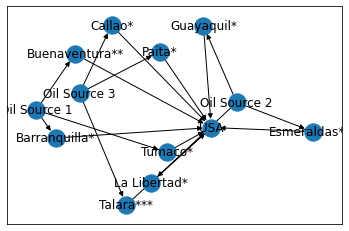

In [3]:
nx.draw_networkx(G, with_labels=True) #Initial Test

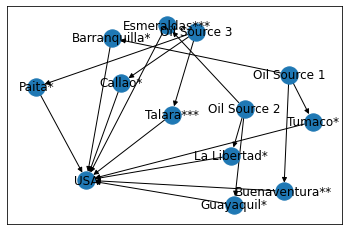

In [4]:
nx.draw_networkx(G, arrows=bool, with_labels=True) 
#playing around with different test functions, not a fan of this graph style

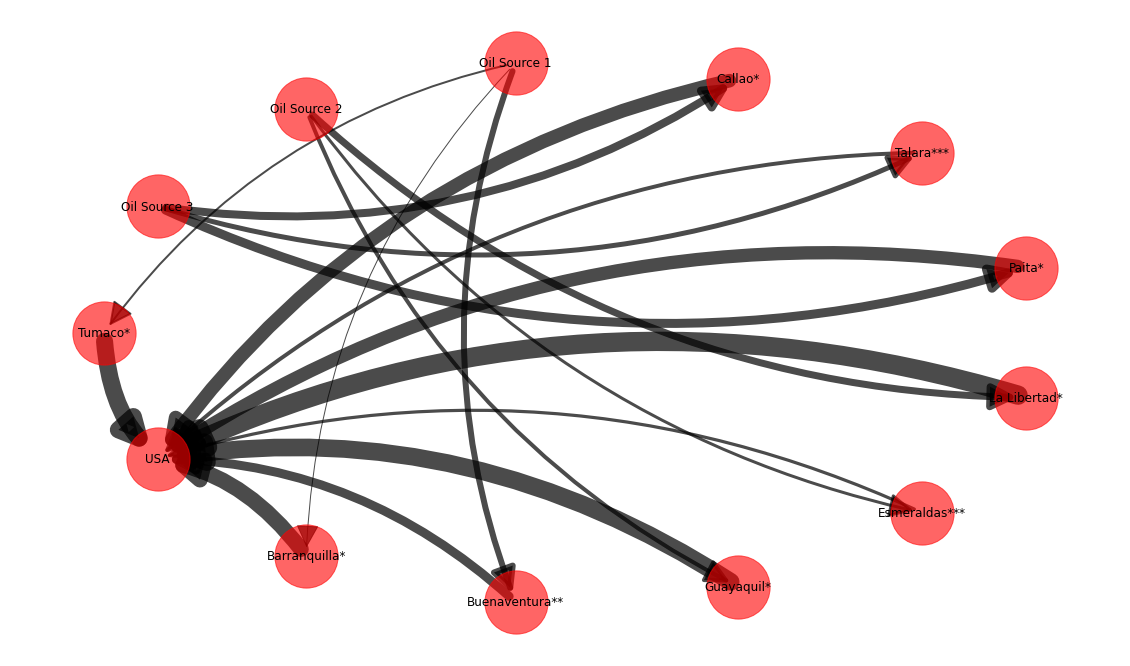

In [5]:
widths = nx.get_edge_attributes(G, 'Weight') #Getting edges to be bigger/smaller based on the variables weight 
nodelist = G.nodes() #Nodes (points) names will be the names in the listed column
plt.figure(figsize=(20,12)) #(20,12) is the size

pos = nx.shell_layout(G) #IMPORTANT: "shell" can be replaced with other styles to change shape and style
#Layouts include: graphviz, pydot, bipartite, circular, planar, random, rescale, spring, spectral, spiral for nx
nx.draw_networkx_nodes(G,pos,#Just for Nodes
                       nodelist=nodelist, #nodes are the correct nodes
                       node_size=4000, #Make them somewhat large
                       node_color='red',
                       alpha=0.6) #transparancy
nx.draw_networkx_edges(G,pos,connectionstyle=("Arc3, rad=0.19"),#Arc3 and rad contribute to curve and style of edges
                       arrows=True, #Keep arrows on since this is a directed graph
                       arrowsize=50,
                       edgelist = widths.keys(),#aligns with edge attriubtes 
                       width=list(widths.values()),#Uses the width to make the edges
                       edge_color='black',
                       alpha=0.7)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)), #Make sure that nodes have correct labels
                        font_color='black')
plt.box(False)#Just no exterior box
plt.show()
#NOTE: Getting the edges to be correct size in correlation with the correct weight took a lot of work, main goal


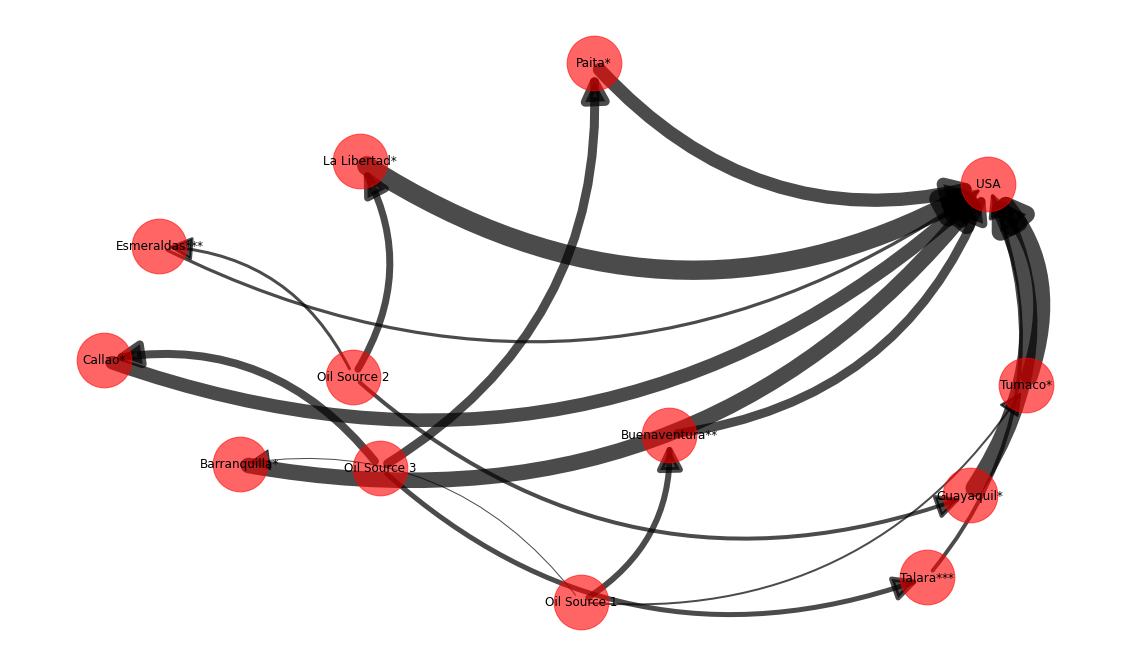

In [6]:
widths = nx.get_edge_attributes(G, 'Weight')
nodelist = G.nodes()
plt.figure(figsize=(20,12))

pos = nx.spring_layout(G) #One of two Network Analysis that I will use, spring is better for individual comparisons
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=3000,
                       node_color='red',
                       alpha=0.6)
nx.draw_networkx_edges(G,pos,connectionstyle=("Arc3, rad=0.3"),
                       arrows=True,
                       arrowsize=50,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='black',
                       alpha=0.7)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black')
plt.box(False)
plt.show()

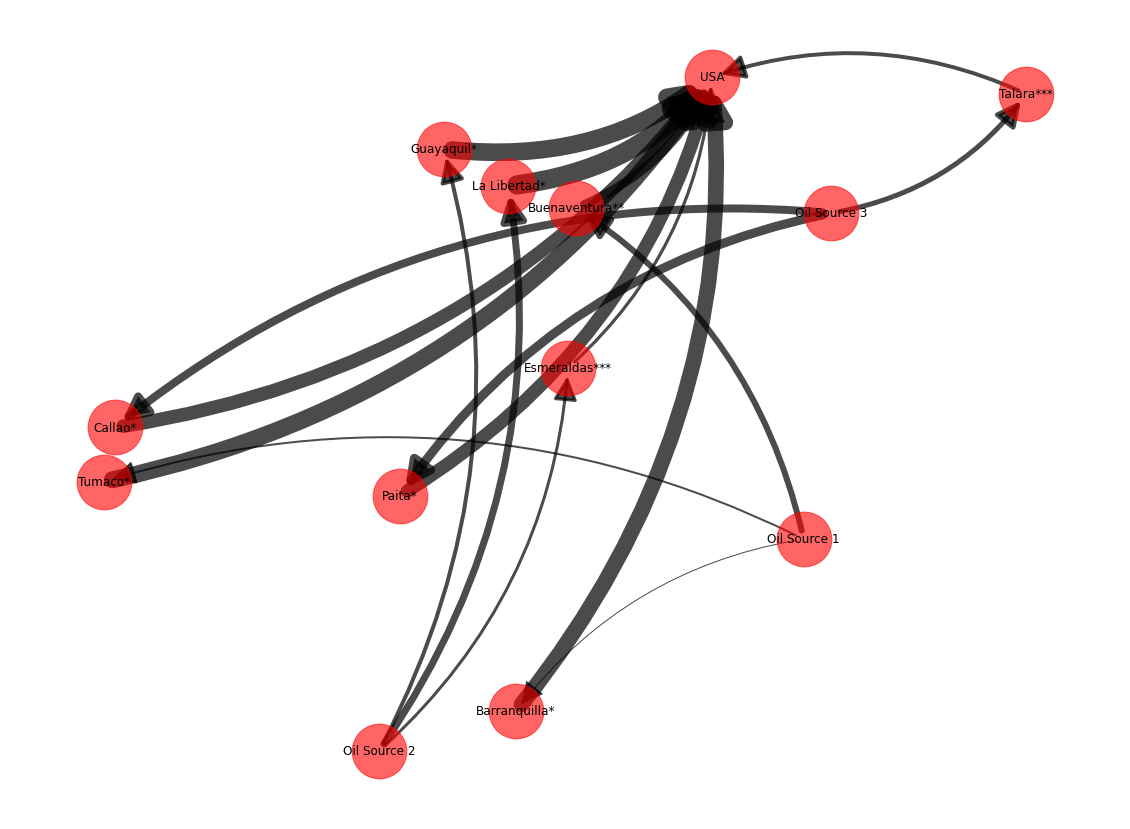

In [132]:
widths = nx.get_edge_attributes(G, 'Weight')
nodelist = G.nodes()
plt.figure(figsize=(20,15))

pos = nx.random_layout(G) #random
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=3000,
                       node_color='red',
                       alpha=0.6)
nx.draw_networkx_edges(G,pos,connectionstyle=("Arc3, rad=0.2"),
                       arrows=True,
                       arrowsize=50,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='black',
                       alpha=0.7)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black')
plt.box(False)
plt.show()

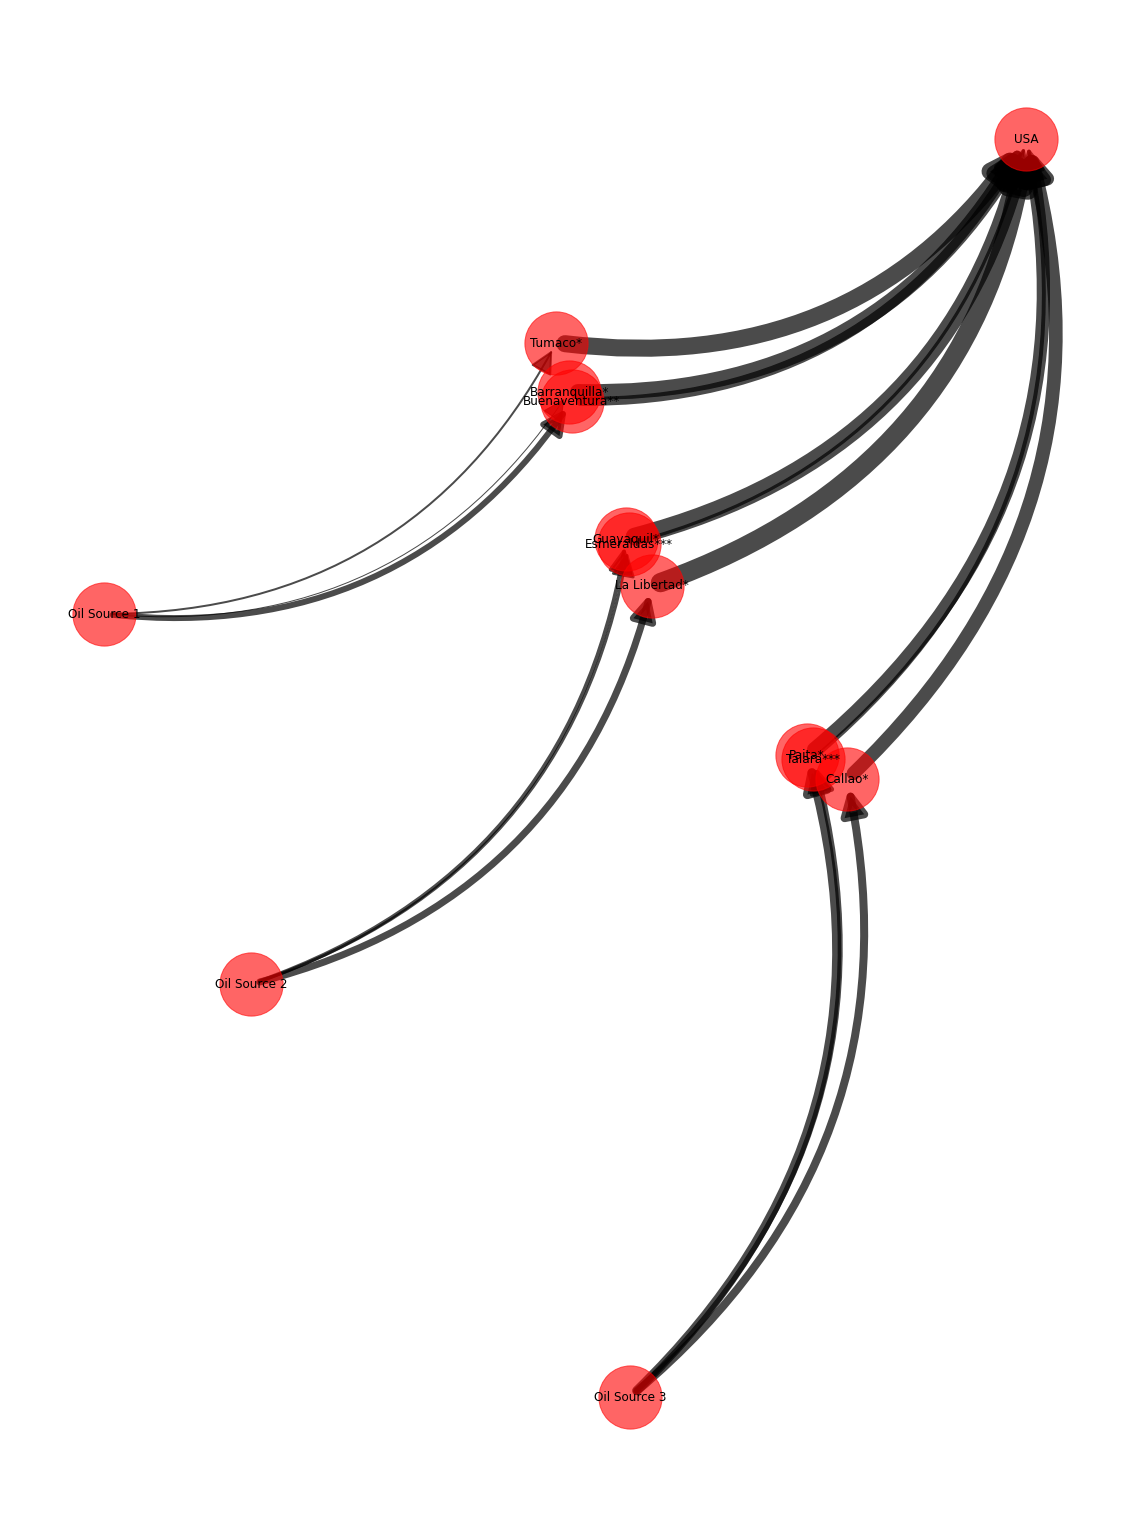

In [8]:
widths = nx.get_edge_attributes(G, 'Weight')
nodelist = G.nodes()
plt.figure(figsize=(20,28))

pos = nx.kamada_kawai_layout(G) #One of the better layouts I prefer, better for country comparisons
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=4000,
                       node_color='red',
                       alpha=0.6)
nx.draw_networkx_edges(G,pos,connectionstyle=("Arc3, rad=0.3"),
                       arrows=True,
                       arrowsize=50,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='black',
                       alpha=0.7)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black')
plt.box(False)
plt.show()

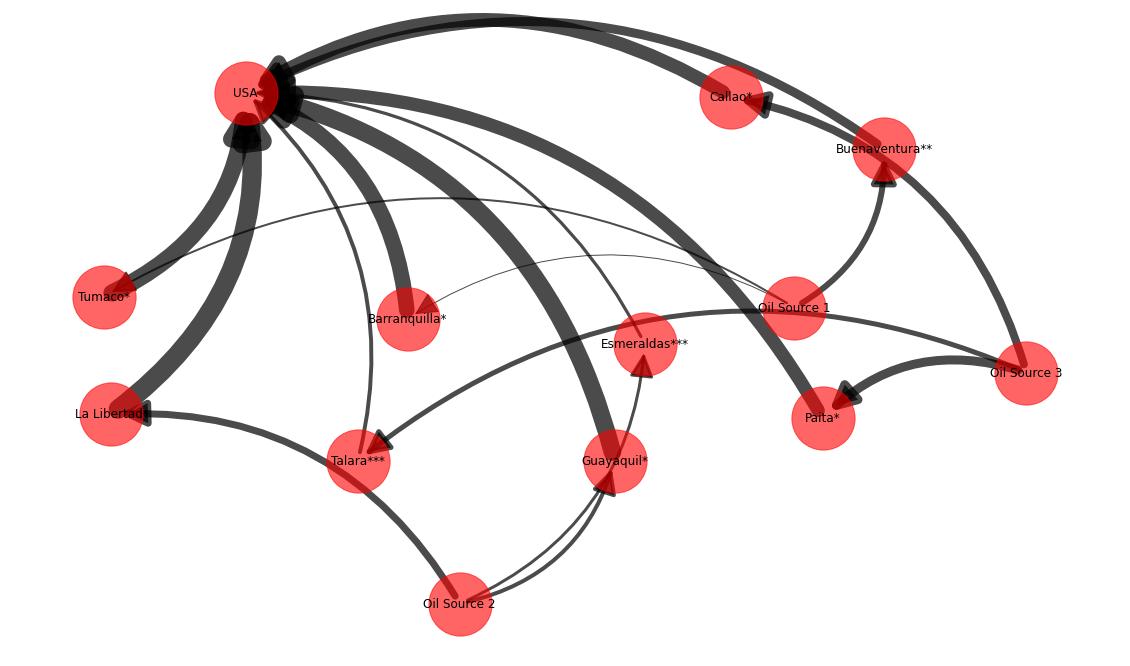

In [134]:
widths = nx.get_edge_attributes(G, 'Weight')
nodelist = G.nodes()
plt.figure(figsize=(20,12))

for u, v, d in G.edges(data=True): #messing with data to get a better look, slightly better results
    d['weight'] = 1.0 / G.degree(u)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=4000,
                       node_color='red',
                       alpha=0.6)
nx.draw_networkx_edges(G,pos,connectionstyle=("Arc3, rad=0.3"),
                       arrows=True,
                       arrowsize=50,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='black',
                       alpha=0.7)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black')
plt.box(False)
plt.show()

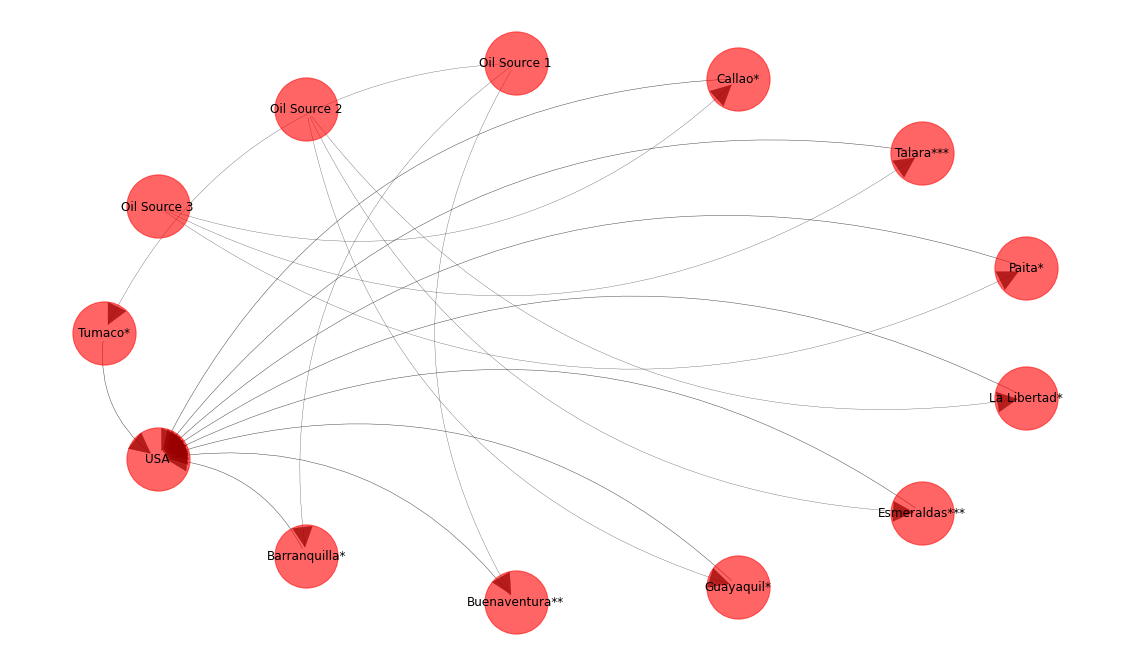

In [139]:
widths = nx.get_edge_attributes(G, 'Weight') #Weights started not working
nodelist = G.nodes()
plt.figure(figsize=(20,12))

pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=4000,
                       node_color='red',
                       alpha=0.6)
nx.draw_networkx_edges(G,pos,connectionstyle=("Arc3, rad=0.3"),
                       arrows=True,
                       arrowsize=50,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='black',
                       alpha=0.7)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black')
plt.box(False)
plt.show()